<a href="https://colab.research.google.com/github/HarshKulkarni7/BML-Practicals-/blob/main/BML_LCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


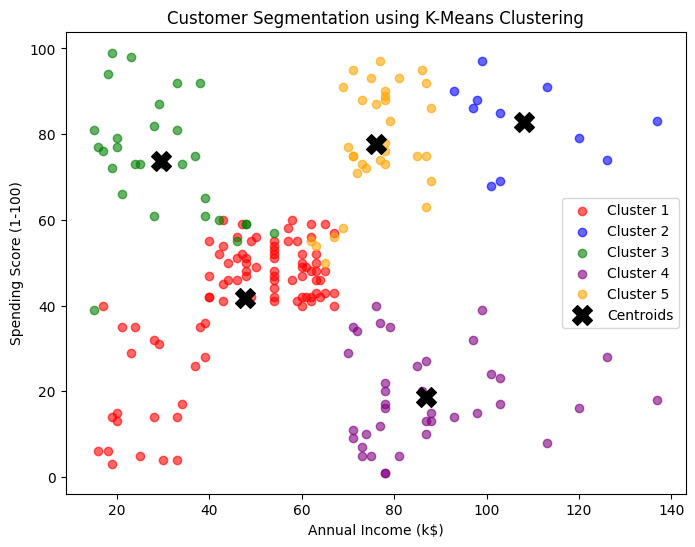


Cluster-wise Average Values:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.213483           47.719101               41.797753
1        32.454545          108.181818               82.727273
2        24.689655           29.586207               73.655172
3        40.394737           87.000000               18.631579
4        31.787879           76.090909               77.757576


In [ ]:
# STEP 1: Import libraries
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# STEP 2: Mount Google Drive (if not already)
drive.mount('/content/drive')

# STEP 3: Load and Clean the Dataset

file_path = '/content/drive/MyDrive/Customers_Data.csv'

# Read dataset (handles files with one messy column)
df_raw = pd.read_csv(file_path, header=None)

# If only one column is detected, split it by whitespace
if df_raw.shape[1] == 1:
    df = df_raw[0].astype(str).str.split(r'\s+', expand=True)
else:
    df = df_raw.copy()

# Assign proper column names
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Remove any extra rows or NaNs
df.dropna(inplace=True)

# Convert data types
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Annual Income (k$)'] = pd.to_numeric(df['Annual Income (k$)'], errors='coerce')
df['Spending Score (1-100)'] = pd.to_numeric(df['Spending Score (1-100)'], errors='coerce')

# Drop any rows with missing numeric data
df = df.dropna()


# STEP 4: Prepare Data for Clustering

# Encode Gender (Male=0, Female=1)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Select relevant features for clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


# STEP 5: Apply K-Means Clustering

k = 5  # You can experiment with this
model = KMeans(n_clusters=k, random_state=42)
clusters = model.fit_predict(X)

# Add cluster labels to dataset
df['Cluster'] = clusters

# STEP 6: Visualize Clusters

plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for cluster_id in range(k):
    plt.scatter(
        X.loc[df['Cluster'] == cluster_id, 'Annual Income (k$)'],
        X.loc[df['Cluster'] == cluster_id, 'Spending Score (1-100)'],
        color=colors[cluster_id], label=f'Cluster {cluster_id+1}', alpha=0.6
    )

# Plot centroids
plt.scatter(
    model.cluster_centers_[:, 2],
    model.cluster_centers_[:, 3],
    marker='X', color='black', s=200, label='Centroids'
)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means Clustering')
plt.legend()
plt.show()

# STEP 7: Cluster Analysis
print("\nCluster-wise Average Values:")
print(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())
